
# Analyzing data from the CIA World Factbook Jupyter Notebook (using SQLite3)



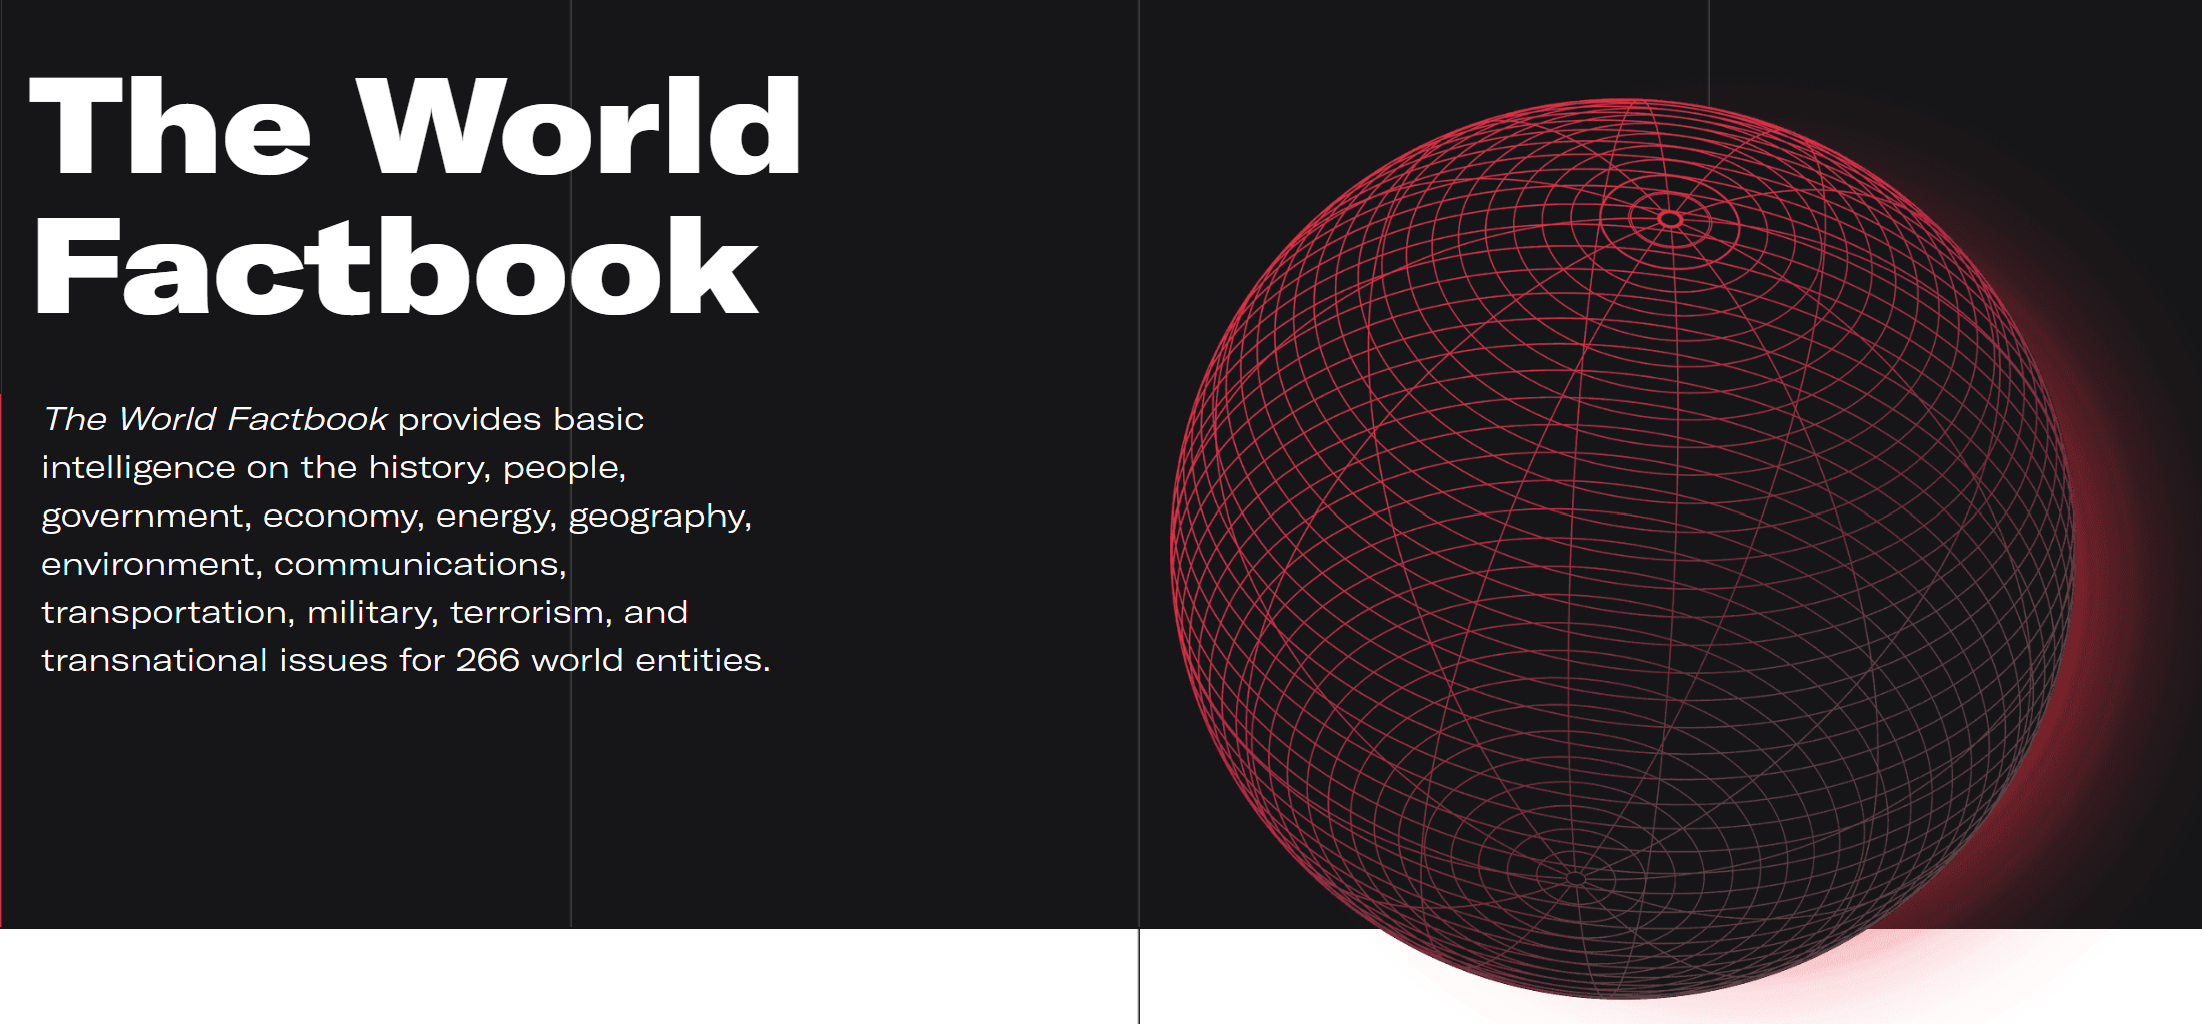



In this project, we'll analyze data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like the following:

- The global population.

- Population_growth: the annual population growth rate, as a percentage.

- Area: the total land and water area.


**We'll use SQLite3 in Jupyter Notebook to analyze data from this database (downloaded to the local machine).**

### Four steps of the project include:
1. Importing SQLite3 and connecting to the database
2. Initial Exploration of the Factbook Database
3. Querying for basic statistics and information
4. Further Exploration and Analysis to answer additional demographic questions

   

## 1. Importing SQLite3 and connecting to the database:

In [55]:
import sqlite3
# Adjust the path to the SQLite database file
path = r"C:/Users/guyal/OneDrive/Documents/Projects_on_jupyter/factbook.db"
# Connect to the SQLite database
try:
    conn = sqlite3.connect(path)
    print("Database connected successfully.")
except sqlite3.Error as e:
    print(f"Database connection error: {e}")

Database connected successfully.


In [56]:
%%capture
# Load the %sql magic extension
%load_ext sql
# Connect to the database using the %sql magic
%sql sqlite:///C:/Users/guyal/OneDrive/Documents/Projects_on_jupyter/factbook.db

## 2. Initial Exploration of the Factbook Database


**2.1. When querying for tables in the database we see 2 tables "sqlite_sequence" and "facts". In this project, we'll explore and analyze data from the "facts" table.**


**2.2Exploration of the columns shows the type of information found in this table, here's a summary:**

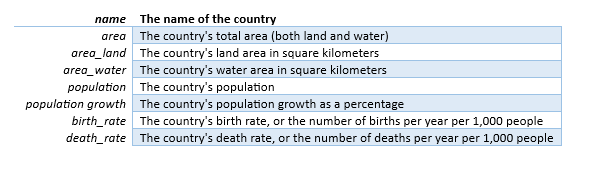


**We see that we can learn a lot about population statistics and areas of different countries, and how they correlate. Let's ask some basic questions like:**
- Which countries have the minimum/maximum population?
- Which countries have the minimum/maximum population growth?

In [103]:
%%sql


SELECT * 
 FROM sqlite_master
WHERE type='table';

 * sqlite:///C:/Users/guyal/OneDrive/Documents/Projects_on_jupyter/factbook.db
Done.


type,name,tbl_name,rootpage,sql
table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, ""code"" varchar(255) NOT NULL, ""name"" varchar(255) NOT NULL, ""area"" integer, ""area_land"" integer, ""area_water"" integer, ""population"" integer, ""population_growth"" float, ""birth_rate"" float, ""death_rate"" float, ""migration_rate"" float)"


In [152]:
%%sql
SELECT *
  FROM facts
  LIMIT 10;

 * sqlite:///C:/Users/guyal/OneDrive/Documents/Projects_on_jupyter/factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
2,al,Albania,28748,27398,1350,3029278,0.3,12.92,6.58,3.3
3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.0
5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46
6,ac,Antigua and Barbuda,442,442,0,92436,1.24,15.85,5.69,2.21
7,ar,Argentina,2780400,2736690,43710,43431886,0.93,16.64,7.33,0.0
8,am,Armenia,29743,28203,1540,3056382,0.15,13.61,9.34,5.8
9,as,Australia,7741220,7682300,58920,22751014,1.07,12.15,7.14,5.65
10,au,Austria,83871,82445,1426,8665550,0.55,9.41,9.42,5.56


## 3. Querying for basic statistics and information from the database

**We see in section 2 that we can learn a lot about population statistics and areas of different countries, and how they correlate. Let's first ask some basic questions like:**
- Which countries have the minimum/maximum population?
- Which countries have the minimum/maximum population growth?



We see a few interesting things in the summary statistics:

- There's a country with a population of 0

- There's a "country" with a population of 7256490011 (or more than 7.2 billion people), further exploration shows that it's just a row that sums up the world's population and other data. So subsequent queries were edited to ignore 'World'  in the country name.

**The table below summarizes the queried data:**

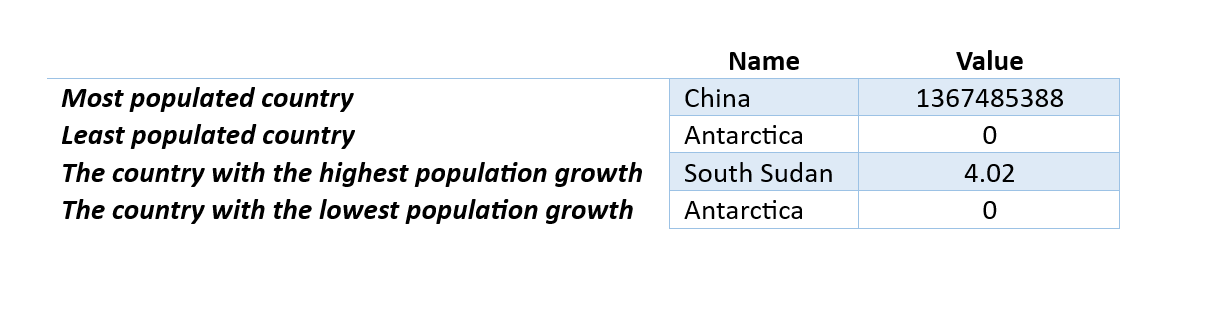

In [75]:
#First retrieve this min/max values from the 'facts' table:
%%sql

SELECT MIN(population) AS min_pop,
       MAX(population) AS max_pop,
       MIN(population_growth) AS min_growth,
       MAX(population_growth) AS max_growth
FROM   facts;


 * sqlite:///C:/Users/guyal/OneDrive/Documents/Projects_on_jupyter/factbook.db
Done.


min_pop,max_pop,min_growth,max_growth
0,7256490011,0.0,4.02


In [187]:
#Country with smallest population:

In [98]:
%%sql


SELECT name 
 FROM facts
WHERE population == (SELECT MIN(population)
                       FROM facts
                    );

 * sqlite:///C:/Users/guyal/OneDrive/Documents/Projects_on_jupyter/factbook.db
Done.


name
Antarctica


**It looks like Antarctica is the least populated country with 0 inhabitants.**

In [97]:
%%sql


SELECT name
 FROM facts
WHERE population == (SELECT MAX(population)
                       FROM facts
                    );

 * sqlite:///C:/Users/guyal/OneDrive/Documents/Projects_on_jupyter/factbook.db
Done.


name
World


**It looks like for MAX population we're getting "World" in the country column, perhaps its the row which sums up the entire world. Let's remove World from our queries:**

In [104]:
%%sql


SELECT MIN(population) AS min_pop,
       MAX(population) AS max_pop,
       MIN(population_growth) AS min_growth,
       MAX(population_growth) AS max_growth
FROM   facts
WHERE name NOT IN ('World');

 * sqlite:///C:/Users/guyal/OneDrive/Documents/Projects_on_jupyter/factbook.db
Done.


min_pop,max_pop,min_growth,max_growth
0,1367485388,0.0,4.02


In [182]:
#Which country has the most people?

In [181]:
%%sql


SELECT name
 FROM facts
WHERE population == (SELECT MAX(population)
                       FROM facts
                      WHERE name NOT IN ('World')
                    );

 * sqlite:///C:/Users/guyal/OneDrive/Documents/Projects_on_jupyter/factbook.db
Done.


name
China


In [183]:
#Which country has the highest growth rate?

In [185]:
%%sql


SELECT name, population_growth
 FROM facts
WHERE population_growth == (SELECT MAX(population_growth)
                       FROM facts
                      WHERE name NOT IN ('World')
                    );

 * sqlite:///C:/Users/guyal/OneDrive/Documents/Projects_on_jupyter/factbook.db
Done.


name,population_growth
South Sudan,4.02


## 4. Further Exploration and Analysis to answer additional demographic questions

**This section queries the database to give information on other information including:**
- Population density
- Water and land areas
- Demographic growth
- Birth and death rates


### Finding Densely Populated Countries

The average population of countries is 62094928 and the average area of countries is 555093.55.
These calculated values can help us in finding countries that are densely populated, that should have the following:

- Above-average values for population.

- Below-average values for area.

**After running the appropriate query we can say that the below list are the most densely populated:**


Bangladesh | Germany | Japan | Philippines | Thailand | United Kingdom  | Vietnam


### Which countries have more water than land?

Two countries are answering this criteria: **British Indian Ocean Territory** and **Virgin Islands**. And here are the top 5 in **water-to-land ratio**:


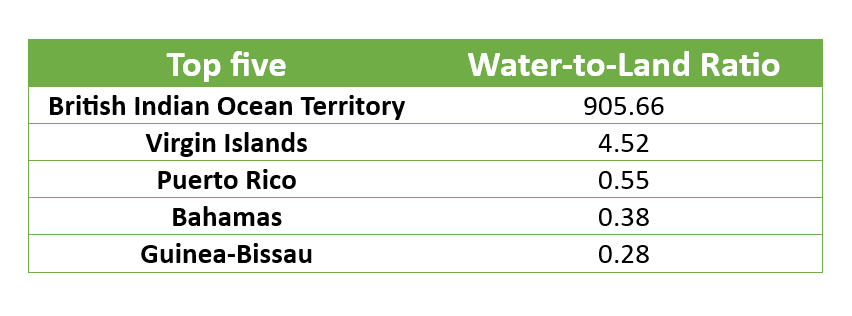

### Which countries will add the most people to their populations next year?


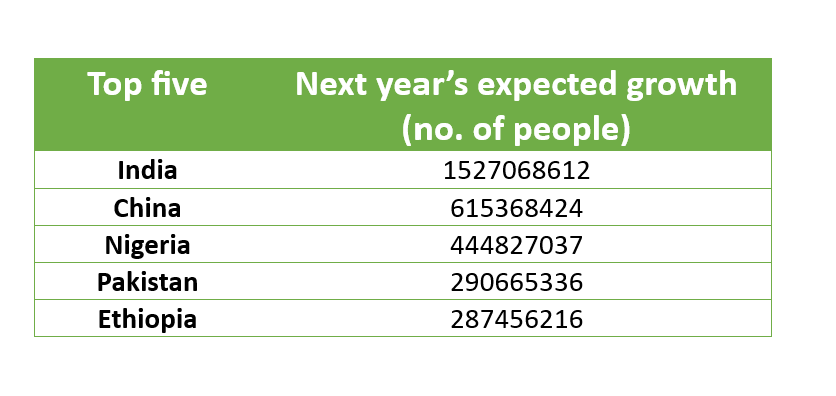


### Which countries are experiencing negative growth? (Their death rate is larger than the birth rate)

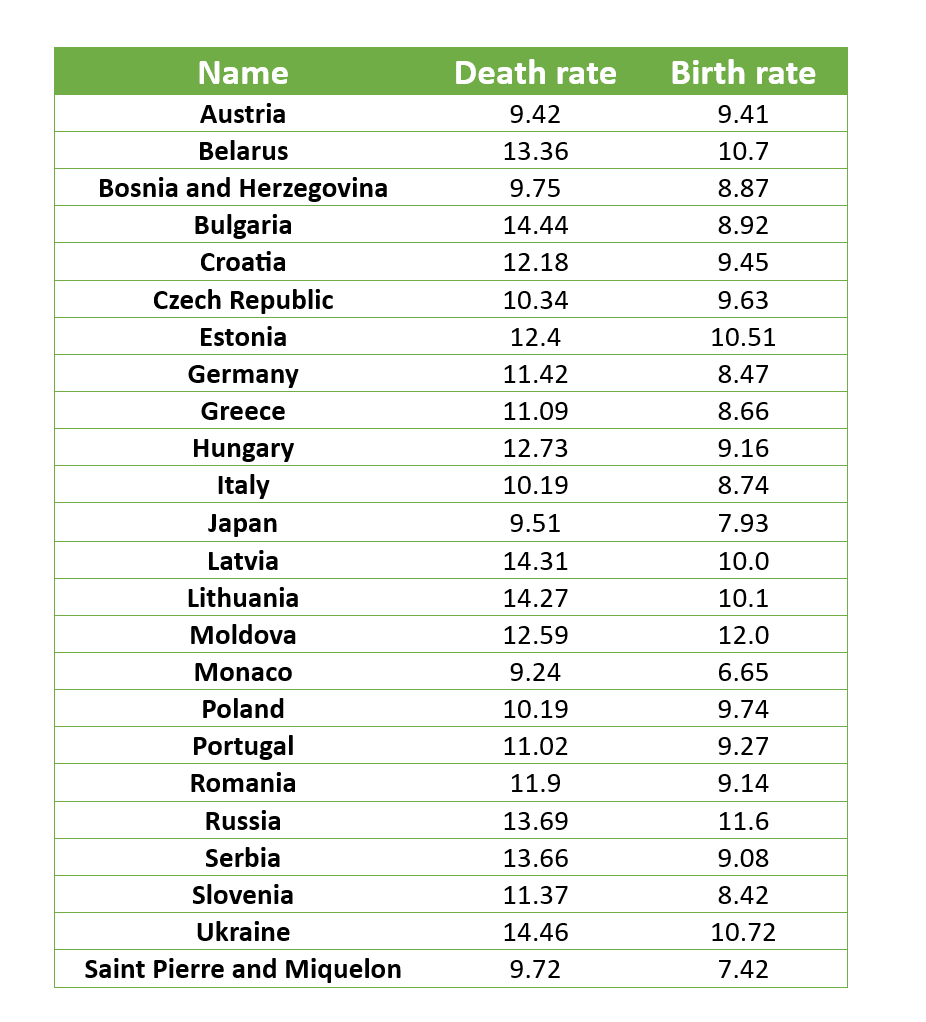
g)

In [107]:
%%sql

SELECT ROUND(AVG(population), 2) AS avg_pop,
       ROUND(AVG(area), 2) AS avg_area
FROM   facts;

 * sqlite:///C:/Users/guyal/OneDrive/Documents/Projects_on_jupyter/factbook.db
Done.


avg_pop,avg_area
62094928.32,555093.55


In [115]:
%%sql


SELECT name, population, area
 FROM facts
WHERE population > (SELECT AVG(population)
                     FROM facts
                   )
      AND area < (SELECT AVG(area)
                   FROM facts
          );

 * sqlite:///C:/Users/guyal/OneDrive/Documents/Projects_on_jupyter/factbook.db
Done.


name,population,area
Bangladesh,168957745,148460
Germany,80854408,357022
Japan,126919659,377915
Philippines,100998376,300000
Thailand,67976405,513120
United Kingdom,64088222,243610
Vietnam,94348835,331210


That's it for the guided steps. Here are some next steps to explore on your own:

Which country has the most people? Which country has the highest growth rate?
Which countries have the highest ratios of water to land? Which countries have more water than land?
Which countries will add the most people to their populations next year?
Which countries have a higher death rate than birth rate?
Which countries have the highest population/area ratio, and how does it compare to list we found in the previous screen?


In [ ]:
#Which countries have the highest ratios of water to land?

In [188]:
%%sql


SELECT name,
       CAST(area_water AS FLOAT) / CAST(area_land AS FLOAT) AS water_to_land_ratio
  FROM facts
WHERE name NOT IN ('World')
ORDER BY water_to_land_ratio DESC
LIMIT 5;

 * sqlite:///C:/Users/guyal/OneDrive/Documents/Projects_on_jupyter/factbook.db
Done.


name,water_to_land_ratio
British Indian Ocean Territory,905.6666666666666
Virgin Islands,4.520231213872832
Puerto Rico,0.5547914317925592
"Bahamas, The",0.3866133866133866
Guinea-Bissau,0.2846728307254623


In [ ]:
#Which countries have more water than land?

In [167]:
%%sql


SELECT name
  FROM facts
WHERE area_water > area_land
      AND name NOT IN ('World');


 * sqlite:///C:/Users/guyal/OneDrive/Documents/Projects_on_jupyter/factbook.db
Done.


name
British Indian Ocean Territory
Virgin Islands


In [117]:
#Which countries will add the most people to their populations next year?

In [176]:
%%sql


SELECT name,
       CAST(population AS FLOAT) * CAST(population_growth AS FLOAT) AS max_yearly_increae
  FROM facts
WHERE name NOT IN ('World')
ORDER BY max_yearly_increae DESC
LIMIT 5;

 * sqlite:///C:/Users/guyal/OneDrive/Documents/Projects_on_jupyter/factbook.db
Done.


name,max_yearly_increae
India,1527068612.48
China,615368424.6
Nigeria,444827037.20000005
Pakistan,290665336.62
Ethiopia,287456216.91


In [ ]:
#Which countries have a higher death rate than birth rate?

In [178]:
%%sql


SELECT name, death_rate, birth_rate
 FROM facts
WHERE death_rate > birth_rate;

 * sqlite:///C:/Users/guyal/OneDrive/Documents/Projects_on_jupyter/factbook.db
Done.


name,death_rate,birth_rate
Austria,9.42,9.41
Belarus,13.36,10.7
Bosnia and Herzegovina,9.75,8.87
Bulgaria,14.44,8.92
Croatia,12.18,9.45
Czech Republic,10.34,9.63
Estonia,12.4,10.51
Germany,11.42,8.47
Greece,11.09,8.66
Hungary,12.73,9.16
